# Asynchronous 8
## Stability Estimates around the Solar Convective Zone

We can get a crude estimate of $ \nabla S $ using a forward difference as 
$$
    \nabla \frac{S_i}{c_p} \approx \frac{1}{\gamma} \frac{\ln T_{i + 1} - \ln T_{i}}{z_{i + 1} - z_i} - \frac{\gamma - 1}{\gamma} \frac{\ln \rho_{i + 1} - \ln \rho_{i}}{z_{i + 1} - z_i} + \mathcal{O}(z_{i + 1} - z_i).
$$
Then, we have

Text(0.5, 1.0, "Entropy Change in Earth's Atmosphere")

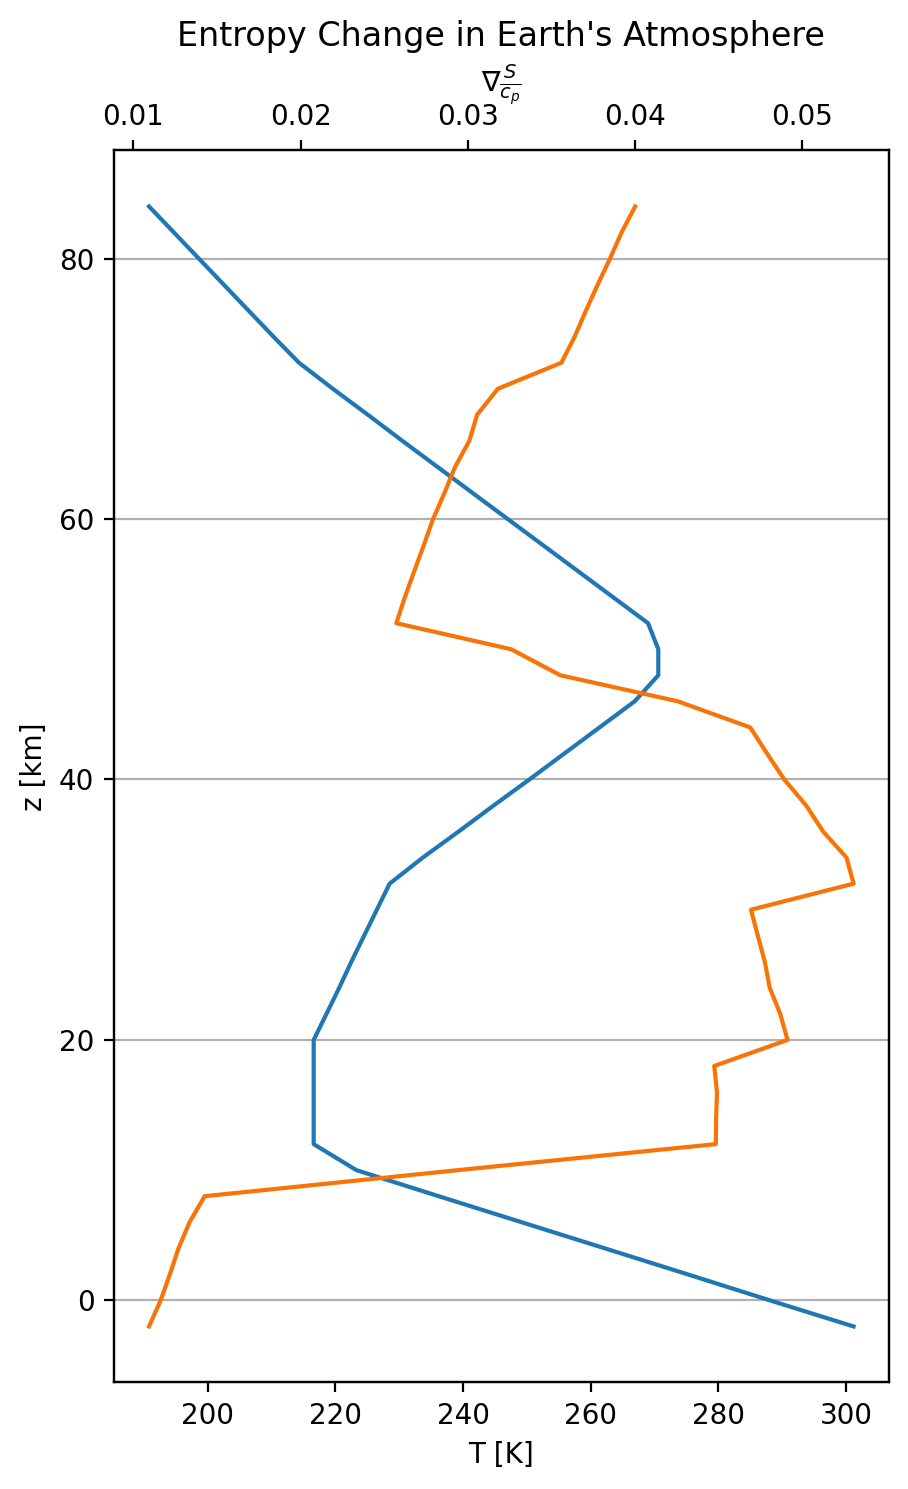

In [10]:
# Required packages and configurations
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'retina'

# Import data
data = pd.read_csv('US_standard_atm_1976.csv', delim_whitespace = True)

N   = data['temp'].size                    # Number of data points
z   = data['alt']                          # Altitudes
lnT = np.log(data['temp'])                 # Log of temeratures
lnρ = np.log(data['dens'])                 # Log of densities
γ   = 7/5                                  # Diatomic gas constant

dS  = np.zeros(N - 1)                      # Entropy gradient

# Compute gradients of S
for i in range(N - 1):
    dz = z[i + 1] - z[i]                   # Change in altitude
    dT = lnT[i + 1] - lnT[i]               # Log change in temp
    dρ = lnρ[i + 1] - lnρ[i]               # Log change in density
    
    dS[i] = (dT - (γ - 1) * dρ) / (γ * dz) # Change in entropy

# Plot temperature
fig, ax = plt.subplots(figsize = [5,8])
ax.plot(data['temp'][0 : N - 1], z[0 : N - 1])
ax.set_xlabel('T [K]')
ax.set_ylabel('z [km]')
ax.grid(axis = 'y')

# Plot gradient of entropy
ax2 = ax.twiny()
ax2.plot(dS, z[0 : N - 1], color = 'xkcd:orange')
ax2.set_xlabel(r'$ \nabla \frac{S}{c_p} $')

ax.set_title('Entropy Change in Earth\'s Atmosphere')

# Miscellaneous tests

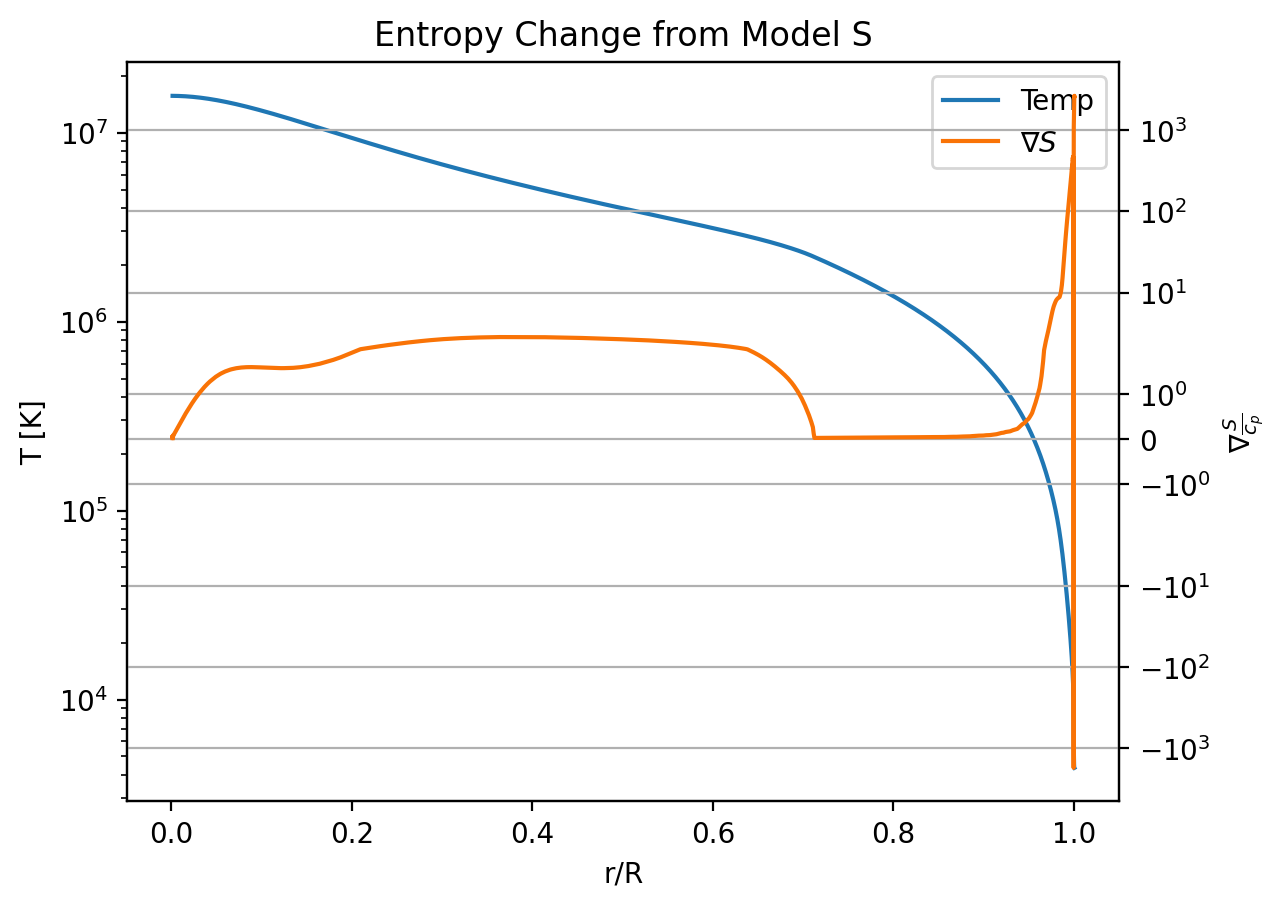

In [5]:
# Import data
data = pd.read_csv('Model_S.csv', delim_whitespace=True)

N = data['r/R'].size                       # Number of data points
z = data['r/R']                            # Relative altitudes
T = data['T']                              # Log of temeratures
ρ = data['rho']                            # Log of densities
γ = 5/3                                    # Diatomic gas constant

dS  = np.zeros(N - 1)                      # Entropy gradient

# Compute gradients of S
for i in range(N - 1):
    dz = z[i + 1] - z[i]                   # Change in altitude
    dT = np.log(T[i + 1] / T[i])           # Log change in temp
    dρ = np.log(ρ[i + 1] / ρ[i])           # Log change in density
    
    dS[i] = (dT - (γ - 1) * dρ) / (γ * dz) # Change in entropy

# Plot temperature
fig, ax = plt.subplots()
ln1 = ax.plot(z[0 : N - 1], T[0 : N - 1], label = 'Temp')
ax.set_xlabel('r/R')
ax.set_ylabel('T [K]')
ax.set_yscale('log')

# Plot gradient of entropy
ax2 = ax.twinx()
ln2 = ax2.plot(z[0 : N - 1], dS, color = 'xkcd:orange', label = r'$ \nabla S $')
ax2.set_ylabel(r'$ \nabla \frac{S}{c_p} $')
ax2.set_yscale('symlog')
ax2.grid()

ax.set_title('Entropy Change from Model S')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 'best')

Text(0.5, 1.0, 'Entropy Change from VAL Atmosphere')

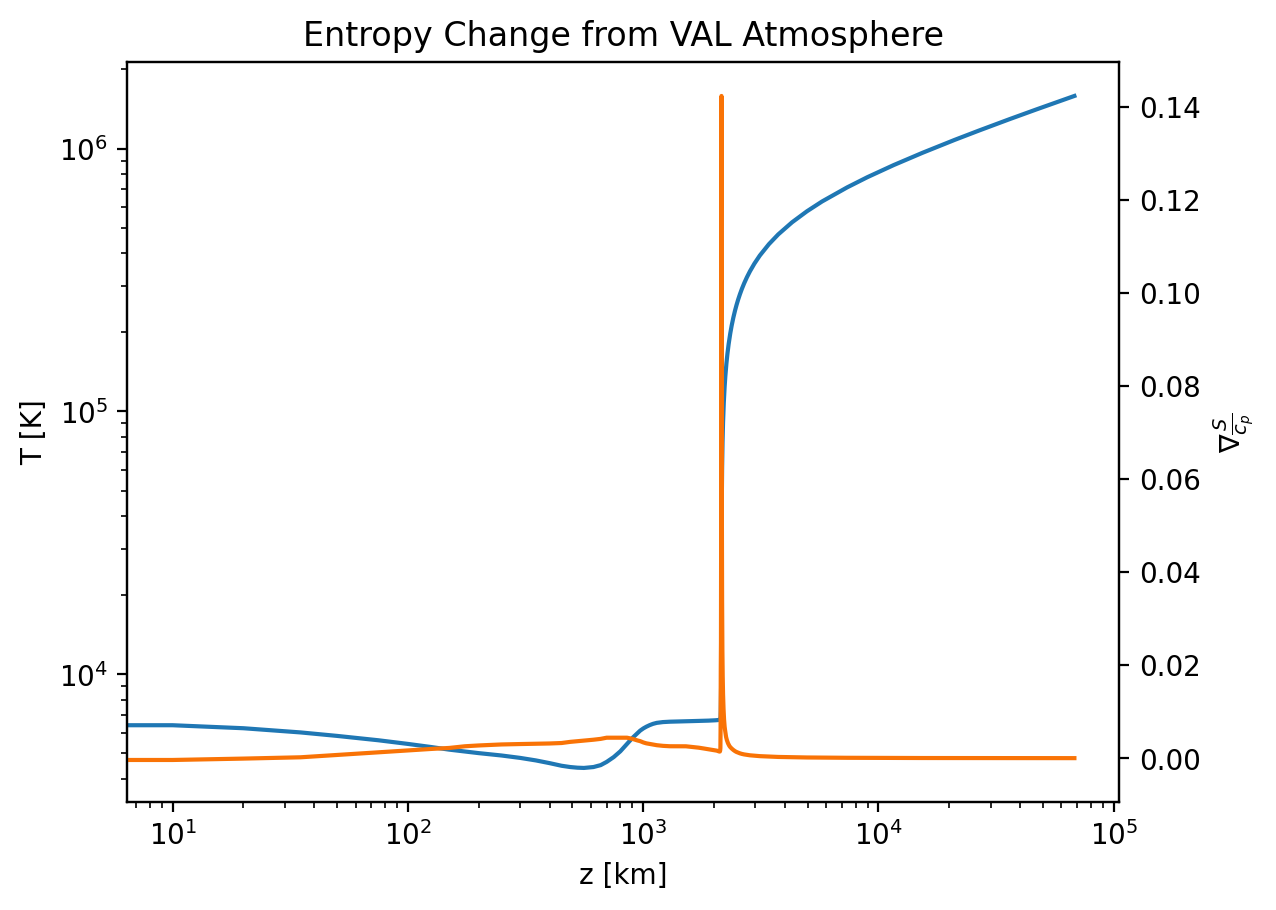

In [5]:
# Import data
data = pd.read_csv('VAL.csv', delim_whitespace=True)

N   = data['height(km)'].size  # Number of data points
z   = data['height(km)']       # Relative altitudes
lnT = np.log(data['T(K)'])     # Log of temeratures
lnρ = np.log(data['n_H'])      # Log of densities
γ   = 5/3                      # Diatomic gas constant

dS  = np.zeros(N - 1)          # Entropy gradient

# Compute gradients of S
for i in range(N - 1):
    dz = z[i + 1] - z[i]       # Change in altitude
    dT = lnT[i + 1] - lnT[i]   # Log change in temp
    dρ = (lnρ[i + 1] - lnρ[i]) # Log change in density
    
    dS[i] = (dT - (γ - 1) * dρ) / (γ * dz) # Change in entropy

# Plot temperature
fig, ax = plt.subplots()
ax.plot(z[0 : N - 1], data['T(K)'][0 : N - 1])
ax.set_xlabel('z [km]')
ax.set_ylabel('T [K]')
ax.set_xscale('log')
ax.set_yscale('log')

# Plot gradient of entropy
ax2 = ax.twinx()
ax2.plot(z[0 : N - 1], dS, color = 'xkcd:orange')
ax2.set_ylabel(r'$ \nabla \frac{S}{c_p} $')

ax.set_title('Entropy Change from VAL Atmosphere')